In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [9]:
# 패션MNIST 데이터셋 로딩
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

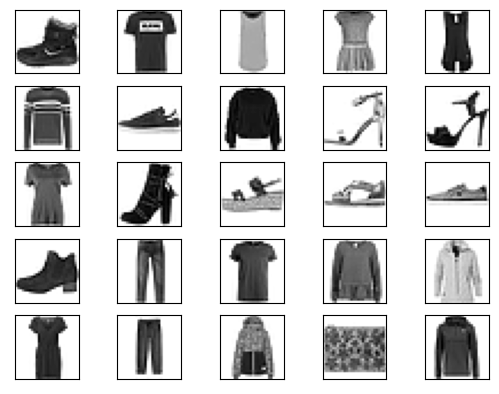

In [5]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()
    

# CNN을 사용하지 않고 분류해 보기

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout((0.2)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5349 - accuracy: 0.8116
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4015 - accuracy: 0.8562
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3666 - accuracy: 0.8655
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3468 - accuracy: 0.8731
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3305 - accuracy: 0.8774
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3181 - accuracy: 0.8826
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3103 - accuracy: 0.8855
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2986 - accuracy: 0.8883
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2907 - accuracy: 0.8918
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.283

[0.329285204410553, 0.8892999887466431]

# CNN으로 Fashion MNIST 분석하기

In [8]:
X_train.reshape(-1, 28, 28, 1).shape

(60000, 28, 28, 1)

In [10]:
X_train_final = X_train.reshape(-1, 28, 28, 1) /255.0
X_test_final = X_test.reshape(-1, 28, 28, 1) /255.0

In [14]:
model_with_conv = Sequential()
model_with_conv.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model_with_conv.add(MaxPooling2D((2,2), strides=2))
model_with_conv.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_with_conv.add(MaxPooling2D((2,2), strides=2))
model_with_conv.add(Flatten())
model_with_conv.add(Dense(127, activation='relu'))
model_with_conv.add(Dense(10, activation='softmax'))
model_with_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_with_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 127)              

In [15]:
model_with_conv.fit(X_train_final, y_train, epochs=10)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4081 - accuracy: 0.8528
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2664 - accuracy: 0.9025
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2218 - accuracy: 0.9183
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1886 - accuracy: 0.9299
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1609 - accuracy: 0.9406
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1366 - accuracy: 0.9498
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1152 - accuracy: 0.9569
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0975 - accuracy: 0.9634
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0829 - accuracy: 0.9696
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

[0.3046247661113739, 0.9185000061988831]

# 전이학습
* 대량의 데이터셋을 이용해서 사전에 학습하고 만들어진 모델의 가중치를 가져와 우리가 원하는 분석에 활용하는 것
* 사전 훈련된 모델을 가져와서 커스터마이징 하는 것을 Fine-tuning이라고 한다.
* 1) 특성 추출법: 사전 훈련된 모델을 가져온 후 마지막 완전연결층 부분만 새로 만듬
  * 합성곱층: 합성곱층과 풀링층으로 구성
  * 완전연경층: 데이터분류기, 추출된 특성을 입력받아 최종적으로 이미지 분류 수행
  * Xception
  * imception V3
  * ResNet50
  * VGG16
  * VGG19
  * MobileNet

### ResNet50 모델을 사용해서 개와 고양이 분류하기

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

In [17]:
base_model = ResNet50(include_top=True, weights='imagenet',input_tensor=None, input_shape=None,
                      pooling=None, classes=1000)

102967424/102967424 [==============================] - 57s 1us/step


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 우리 모델 추가하기
model.trainable = False
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_6 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 25,585,594
Non-trainable params: 53,120
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=modelpath, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [33]:
batch_size = 16
image_height = 224
image_weight = 224
train_dir = "./data/catanddog/train/"
test_dir = "./data/catanddog/validation/"

In [34]:
# 다양한 이미지 샘플을 만들기위한 이미지 변형작업
train = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
        )

train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_weight),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')
valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(test_dir,
                                            target_size=(image_height, image_weight),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical'
                                           )

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [35]:
history = model.fit(train_generator, epochs=2000, validation_data=valid_generator, verbose=2,
                   callbacks=[early_stopping_callback, checkpoint])

Epoch 1/2000

Epoch 1: saving model to ./model\01-0.5000.hdf5
25/25 - 17s - loss: 0.6838 - accuracy: 0.6883 - val_loss: 0.6940 - val_accuracy: 0.5000 - 17s/epoch - 666ms/step
Epoch 2/2000

Epoch 2: saving model to ./model\02-0.5000.hdf5
25/25 - 13s - loss: 0.6893 - accuracy: 0.5922 - val_loss: 0.6941 - val_accuracy: 0.5000 - 13s/epoch - 510ms/step
Epoch 3/2000

Epoch 3: saving model to ./model\03-0.5000.hdf5
25/25 - 13s - loss: 0.6895 - accuracy: 0.5429 - val_loss: 0.6940 - val_accuracy: 0.5000 - 13s/epoch - 511ms/step
Epoch 4/2000

Epoch 4: saving model to ./model\04-0.5000.hdf5
25/25 - 13s - loss: 0.6894 - accuracy: 0.5740 - val_loss: 0.6941 - val_accuracy: 0.5000 - 13s/epoch - 513ms/step
Epoch 5/2000

Epoch 5: saving model to ./model\05-0.5000.hdf5
25/25 - 13s - loss: 0.6875 - accuracy: 0.5740 - val_loss: 0.6941 - val_accuracy: 0.5000 - 13s/epoch - 509ms/step
Epoch 6/2000

Epoch 6: saving model to ./model\06-0.5000.hdf5
25/25 - 14s - loss: 0.6922 - accuracy: 0.5247 - val_loss: 0.695

Epoch 48/2000

Epoch 48: saving model to ./model\48-0.5714.hdf5
25/25 - 13s - loss: 0.6248 - accuracy: 0.6545 - val_loss: 0.6576 - val_accuracy: 0.5714 - 13s/epoch - 519ms/step
Epoch 49/2000

Epoch 49: saving model to ./model\49-0.6429.hdf5
25/25 - 13s - loss: 0.6297 - accuracy: 0.6078 - val_loss: 0.6440 - val_accuracy: 0.6429 - 13s/epoch - 511ms/step
Epoch 50/2000

Epoch 50: saving model to ./model\50-0.5816.hdf5
25/25 - 13s - loss: 0.6171 - accuracy: 0.6545 - val_loss: 0.6565 - val_accuracy: 0.5816 - 13s/epoch - 530ms/step
Epoch 51/2000

Epoch 51: saving model to ./model\51-0.5714.hdf5
25/25 - 13s - loss: 0.6287 - accuracy: 0.6519 - val_loss: 0.6577 - val_accuracy: 0.5714 - 13s/epoch - 523ms/step
Epoch 52/2000

Epoch 52: saving model to ./model\52-0.6224.hdf5
25/25 - 13s - loss: 0.6145 - accuracy: 0.6805 - val_loss: 0.6521 - val_accuracy: 0.6224 - 13s/epoch - 530ms/step
Epoch 53/2000

Epoch 53: saving model to ./model\53-0.5816.hdf5
25/25 - 14s - loss: 0.6388 - accuracy: 0.6260 - val

25/25 - 13s - loss: 0.5471 - accuracy: 0.7221 - val_loss: 0.7354 - val_accuracy: 0.6122 - 13s/epoch - 515ms/step
Epoch 95/2000

Epoch 95: saving model to ./model\95-0.6224.hdf5
25/25 - 13s - loss: 0.5490 - accuracy: 0.7247 - val_loss: 0.6861 - val_accuracy: 0.6224 - 13s/epoch - 525ms/step
Epoch 96/2000

Epoch 96: saving model to ./model\96-0.6735.hdf5
25/25 - 13s - loss: 0.5016 - accuracy: 0.7506 - val_loss: 0.6410 - val_accuracy: 0.6735 - 13s/epoch - 514ms/step
Epoch 97/2000

Epoch 97: saving model to ./model\97-0.6224.hdf5
25/25 - 13s - loss: 0.5589 - accuracy: 0.7143 - val_loss: 0.6874 - val_accuracy: 0.6224 - 13s/epoch - 516ms/step
Epoch 98/2000

Epoch 98: saving model to ./model\98-0.6531.hdf5
25/25 - 13s - loss: 0.5266 - accuracy: 0.7273 - val_loss: 0.7211 - val_accuracy: 0.6531 - 13s/epoch - 519ms/step
Epoch 99/2000

Epoch 99: saving model to ./model\99-0.6020.hdf5
25/25 - 13s - loss: 0.5389 - accuracy: 0.7351 - val_loss: 0.7222 - val_accuracy: 0.6020 - 13s/epoch - 513ms/step
Ep

Epoch 140/2000

Epoch 140: saving model to ./model\140-0.6633.hdf5
25/25 - 13s - loss: 0.4367 - accuracy: 0.7870 - val_loss: 0.6812 - val_accuracy: 0.6633 - 13s/epoch - 513ms/step
Epoch 141/2000

Epoch 141: saving model to ./model\141-0.5816.hdf5
25/25 - 13s - loss: 0.3830 - accuracy: 0.8442 - val_loss: 0.7387 - val_accuracy: 0.5816 - 13s/epoch - 522ms/step
Epoch 142/2000

Epoch 142: saving model to ./model\142-0.6224.hdf5
25/25 - 13s - loss: 0.5519 - accuracy: 0.7377 - val_loss: 0.6769 - val_accuracy: 0.6224 - 13s/epoch - 531ms/step
Epoch 143/2000

Epoch 143: saving model to ./model\143-0.5510.hdf5
25/25 - 14s - loss: 0.5652 - accuracy: 0.7169 - val_loss: 0.8927 - val_accuracy: 0.5510 - 14s/epoch - 565ms/step
Epoch 144/2000

Epoch 144: saving model to ./model\144-0.5918.hdf5
25/25 - 14s - loss: 0.5512 - accuracy: 0.7143 - val_loss: 0.7767 - val_accuracy: 0.5918 - 14s/epoch - 557ms/step
Epoch 145/2000

Epoch 145: saving model to ./model\145-0.7041.hdf5
25/25 - 13s - loss: 0.5025 - accu

Epoch 186/2000

Epoch 186: saving model to ./model\186-0.6939.hdf5
25/25 - 13s - loss: 0.3574 - accuracy: 0.8623 - val_loss: 0.6941 - val_accuracy: 0.6939 - 13s/epoch - 521ms/step
Epoch 187/2000

Epoch 187: saving model to ./model\187-0.5612.hdf5
25/25 - 13s - loss: 0.4501 - accuracy: 0.8338 - val_loss: 0.6865 - val_accuracy: 0.5612 - 13s/epoch - 521ms/step
Epoch 188/2000

Epoch 188: saving model to ./model\188-0.6633.hdf5
25/25 - 13s - loss: 0.5905 - accuracy: 0.6935 - val_loss: 0.6170 - val_accuracy: 0.6633 - 13s/epoch - 521ms/step
Epoch 189/2000

Epoch 189: saving model to ./model\189-0.5918.hdf5
25/25 - 13s - loss: 0.5280 - accuracy: 0.7273 - val_loss: 1.0477 - val_accuracy: 0.5918 - 13s/epoch - 519ms/step
Epoch 190/2000

Epoch 190: saving model to ./model\190-0.6020.hdf5
25/25 - 13s - loss: 0.4735 - accuracy: 0.7818 - val_loss: 1.0833 - val_accuracy: 0.6020 - 13s/epoch - 519ms/step
Epoch 191/2000

Epoch 191: saving model to ./model\191-0.6122.hdf5
25/25 - 13s - loss: 0.4431 - accu

Epoch 232/2000

Epoch 232: saving model to ./model\232-0.7551.hdf5
25/25 - 13s - loss: 0.2731 - accuracy: 0.8909 - val_loss: 0.6374 - val_accuracy: 0.7551 - 13s/epoch - 501ms/step
Epoch 233/2000

Epoch 233: saving model to ./model\233-0.7041.hdf5
25/25 - 12s - loss: 0.2657 - accuracy: 0.8909 - val_loss: 0.6971 - val_accuracy: 0.7041 - 12s/epoch - 500ms/step
Epoch 234/2000

Epoch 234: saving model to ./model\234-0.7347.hdf5
25/25 - 12s - loss: 0.2630 - accuracy: 0.8857 - val_loss: 0.6078 - val_accuracy: 0.7347 - 12s/epoch - 497ms/step
Epoch 235/2000

Epoch 235: saving model to ./model\235-0.7245.hdf5
25/25 - 13s - loss: 0.2655 - accuracy: 0.8909 - val_loss: 0.7148 - val_accuracy: 0.7245 - 13s/epoch - 516ms/step
Epoch 236/2000

Epoch 236: saving model to ./model\236-0.6939.hdf5
25/25 - 13s - loss: 0.3265 - accuracy: 0.8701 - val_loss: 0.7297 - val_accuracy: 0.6939 - 13s/epoch - 518ms/step
Epoch 237/2000

Epoch 237: saving model to ./model\237-0.7245.hdf5
25/25 - 13s - loss: 0.2410 - accu

Epoch 278/2000

Epoch 278: saving model to ./model\278-0.6020.hdf5
25/25 - 14s - loss: 0.2447 - accuracy: 0.8935 - val_loss: 0.9224 - val_accuracy: 0.6020 - 14s/epoch - 553ms/step
Epoch 279/2000

Epoch 279: saving model to ./model\279-0.5612.hdf5
25/25 - 13s - loss: 0.3934 - accuracy: 0.8390 - val_loss: 0.8911 - val_accuracy: 0.5612 - 13s/epoch - 540ms/step
Epoch 280/2000

Epoch 280: saving model to ./model\280-0.5000.hdf5
25/25 - 13s - loss: 0.3370 - accuracy: 0.8416 - val_loss: 1.1412 - val_accuracy: 0.5000 - 13s/epoch - 535ms/step
Epoch 281/2000

Epoch 281: saving model to ./model\281-0.6837.hdf5
25/25 - 13s - loss: 0.2882 - accuracy: 0.8831 - val_loss: 0.7829 - val_accuracy: 0.6837 - 13s/epoch - 537ms/step
Epoch 282/2000

Epoch 282: saving model to ./model\282-0.5816.hdf5
25/25 - 14s - loss: 0.3187 - accuracy: 0.8545 - val_loss: 1.0864 - val_accuracy: 0.5816 - 14s/epoch - 546ms/step
Epoch 283/2000

Epoch 283: saving model to ./model\283-0.7653.hdf5
25/25 - 14s - loss: 0.3250 - accu

In [36]:
import matplotlib as mpl
import koreanize_matplotlib

Text(0.5, 1.0, '오차')

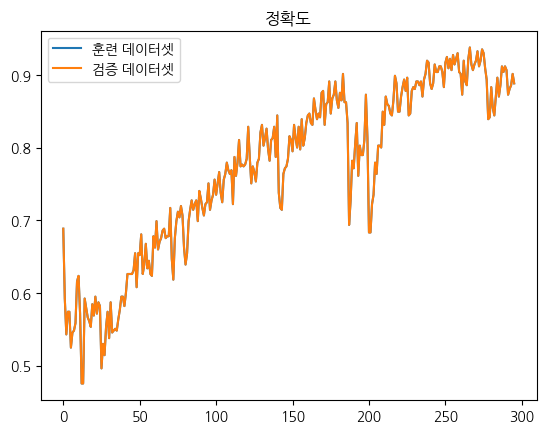

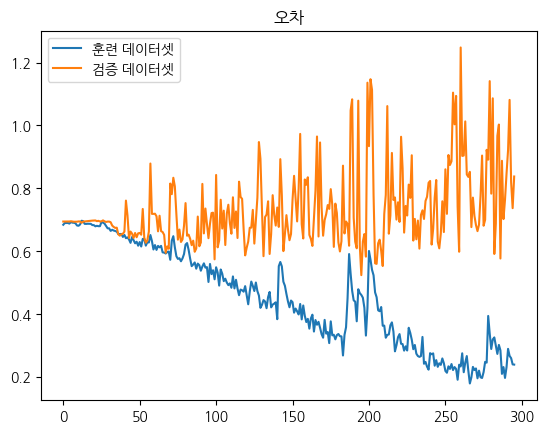

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='훈련 데이터셋')
plt.plot(epochs, val_accuracy, label='검증 데이터셋')
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label='훈련 데이터셋')
plt.plot(epochs, val_loss, label='검증 데이터셋')
plt.legend()
plt.title('오차')


1/1 [==============================] - 0s 35ms/step


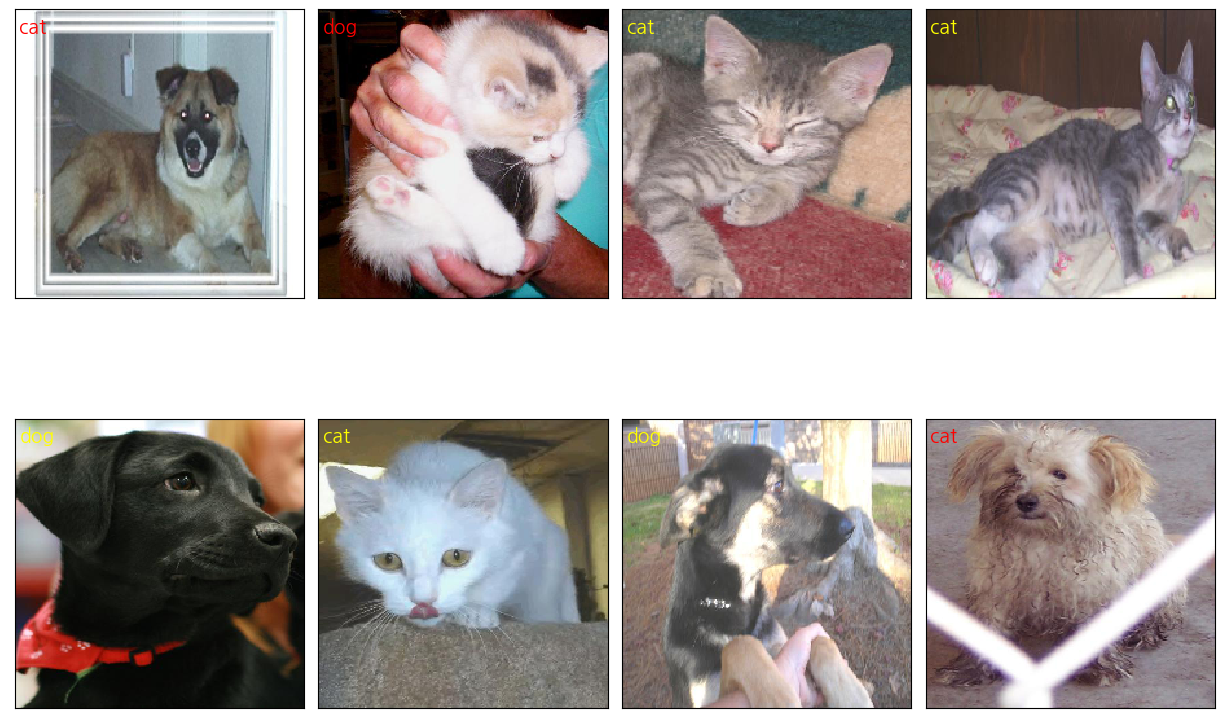

In [42]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)
        

# 텐서플로 허브에서 모델 가져와 사용하기

In [43]:
import tensorflow_hub as hub
model = tf.keras.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False))
model.add(Dense(2, activation='softmax'))

1/1 [==============================] - 3s 3s/step


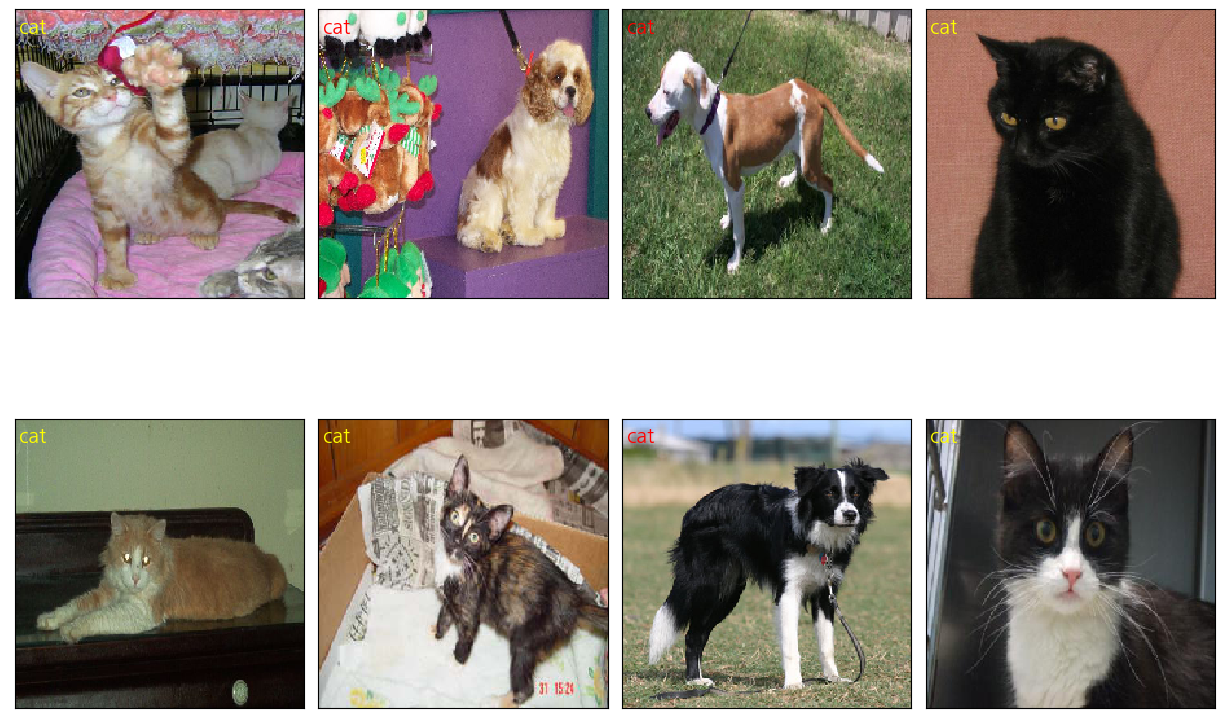

In [44]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i +1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3,17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3,17, class_names[prediction_values[i]], color='red', fontsize=14)